# 1. Import useful libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read csv file

In [ ]:
df = pd.read_csv('Robbery_Open_Data.csv')

In [ ]:
df.shape

(33063, 31)

# 3. Check for null values and clean them

In [ ]:
df.isnull().sum()

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             2
OCC_MONTH            2
OCC_DAY              2
OCC_DOY              2
OCC_DOW              2
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

Select null values with a mask and grab the entries

In [ ]:
null_mask = df.isnull().any(axis=1)
entries_with_nulls = df[null_mask]

In [ ]:
entries_with_nulls[['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW']]

,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW
4095,NaN,NaN,NaN,NaN,NaN
17212,NaN,NaN,NaN,NaN,NaN


Drop rows that have null values and reset the index

In [ ]:
df_clean = df.dropna(axis=0)
df_clean.reset_index(inplace=True)
df_clean.drop(columns='index', inplace=True)

<ipython-input-264-56cc46b2c040>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns='index', inplace=True)


Double-check if there are any remaining null values

In [ ]:
df_clean.isnull().sum()

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOY              0
OCC_DOW              0
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

# 4. Figure out how to visualize the data

In [ ]:
df_clean.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,6.327780e-09,5.664924e-09,1,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
1,6.327780e-09,5.664924e-09,2,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,200,Robbery - Mugging,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
2,-8.837004e+06,5.413576e+06,3,GO-20141262818,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,210,Robbery - Business,Robbery,167,Church-Wellesley,75,Church-Yonge Corridor (75),-79.384154,43.663898
3,-8.838990e+06,5.411070e+06,4,GO-20141260912,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,100,Robbery With Weapon,Robbery,164,Wellington Place,78,Kensington-Chinatown (78),-79.401998,43.647607
4,-8.851703e+06,5.419157e+06,5,GO-20141262644,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,150,Robbery - Purse Snatch,Robbery,113,Weston,113,Weston (113),-79.516198,43.700152


In [ ]:
df_clean.columns

Index(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE',
       'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW',
       'REPORT_HOUR', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW',
       'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE',
       'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84'],
      dtype='object')

If we use the unique function we see that there are different robbery categories:

In [ ]:
df_clean['OFFENCE'].unique()

array(['Robbery - Swarming', 'Robbery - Mugging', 'Robbery - Business',
       'Robbery With Weapon', 'Robbery - Purse Snatch', 'Robbery - Other',
       'Robbery - Financial Institute', 'Robbery - Armoured Car',
       'Robbery - Vehicle Jacking', 'Robbery - Taxi',
       'Robbery - Home Invasion', 'Robbery - Delivery Person',
       'Robbery - Atm', 'Robbery To Steal Firearm'], dtype=object)

We want to see the number of reports for every type of robbery per year, therefore we group by those categories. We also select EVENT_UNIQUE_ID in order to apply the count function correctly.

In [ ]:
df_grouped = df_clean[['EVENT_UNIQUE_ID', 'REPORT_YEAR', 'OFFENCE']].groupby(['REPORT_YEAR', 'OFFENCE']).count()

Attempt 1: doesn't show the plot that we were expecting. The data isn't properly categorized.

<Axes: xlabel='REPORT_YEAR,OFFENCE'>

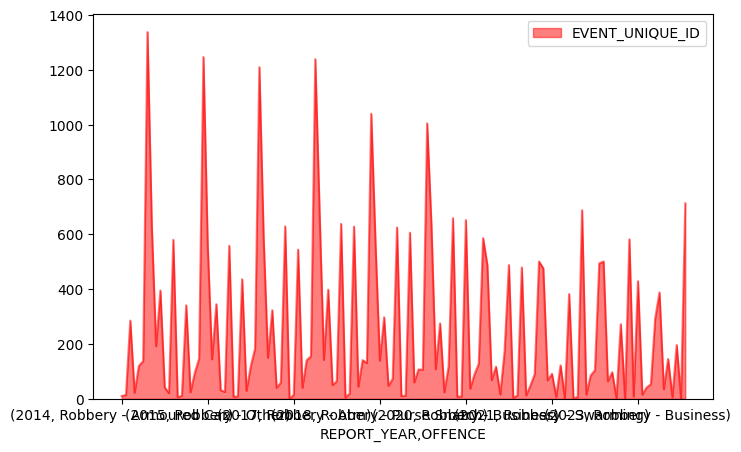

In [ ]:
df_grouped.plot(kind='area', stacked=False, figsize=(8, 5), color='r')

Lets try to see the df_grouped:

In [ ]:
df_grouped.head(13)

EVENT_UNIQUE_ID
REPORT_YEAR OFFENCE                                       
2014        Robbery - Armoured Car                      10
            Robbery - Atm                               14
            Robbery - Business                         285
            Robbery - Delivery Person                   22
            Robbery - Financial Institute              120
            Robbery - Home Invasion                    138
            Robbery - Mugging                         1338
            Robbery - Other                            630
            Robbery - Purse Snatch                     192
            Robbery - Swarming                         395
            Robbery - Taxi                              42
            Robbery - Vehicle Jacking                   20
            Robbery With Weapon                        580

If we look at df_grouped.index, we see that we have a multi index, we don't want that. We only want the year as the index, and the robbery time as columns.

In [ ]:
df_grouped.index

MultiIndex([(2014,        'Robbery - Armoured Car'),
            (2014,                 'Robbery - Atm'),
            (2014,            'Robbery - Business'),
            (2014,     'Robbery - Delivery Person'),
            (2014, 'Robbery - Financial Institute'),
            (2014,       'Robbery - Home Invasion'),
            (2014,             'Robbery - Mugging'),
            (2014,               'Robbery - Other'),
            (2014,        'Robbery - Purse Snatch'),
            (2014,            'Robbery - Swarming'),
            ...
            (2023, 'Robbery - Financial Institute'),
            (2023,       'Robbery - Home Invasion'),
            (2023,             'Robbery - Mugging'),
            (2023,               'Robbery - Other'),
            (2023,        'Robbery - Purse Snatch'),
            (2023,            'Robbery - Swarming'),
            (2023,                'Robbery - Taxi'),
            (2023,     'Robbery - Vehicle Jacking'),
            (2023,      'Robbe

We can unstack the second level (index 1) of the multi index:

In [ ]:
df_area = df_grouped.unstack(level=1)
df_area.head()

EVENT_UNIQUE_ID                                   \
OFFENCE     Robbery - Armoured Car Robbery - Atm Robbery - Business   
REPORT_YEAR                                                           
2014                          10.0          14.0              285.0   
2015                           6.0          11.0              341.0   
2016                           7.0           9.0              436.0   
2017                           1.0          14.0              544.0   
2018                           5.0          19.0              628.0   

                                                                     \
OFFENCE     Robbery - Delivery Person Robbery - Financial Institute   
REPORT_YEAR                                                           
2014                             22.0                         120.0   
2015                             24.0                          95.0   
2016                             29.0                         118.0   
2017                             40.0                         141.0   
2018                             44.0                         141.0   

                                                                       \
OFFENCE     Robbery - Home Invasion Robbery - Mugging Robbery - Other   
REPORT_YEAR                                                             
2014                          138.0            1338.0           630.0   
2015                          146.0            1247.0           559.0   
2016                          183.0            1210.0           584.0   
2017                          155.0            1239.0           679.0   
2018                          130.0            1040.0           565.0   

                                                                      \
OFFENCE     Robbery - Purse Snatch Robbery - Swarming Robbery - Taxi   
REPORT_YEAR                                                            
2014                         192.0              395.0           42.0   
2015                         144.0              345.0           31.0   
2016                         150.0              323.0           40.0   
2017                         142.0              398.0           50.0   
2018                         139.0              297.0           47.0   

                                                                \
OFFENCE     Robbery - Vehicle Jacking Robbery To Steal Firearm   
REPORT_YEAR                                                      
2014                             20.0                      NaN   
2015                             25.0                      NaN   
2016                             59.0                      NaN   
2017                             64.0                      NaN   
2018                             73.0                      NaN   

                                 
OFFENCE     Robbery With Weapon  
REPORT_YEAR                      
2014                      580.0  
2015                      558.0  
2016                      629.0  
2017                      638.0  
2018                      625.0

Now, the index seems fine, however, lets see what happened to the columns:

In [ ]:
df_area.columns

MultiIndex([('EVENT_UNIQUE_ID',        'Robbery - Armoured Car'),
            ('EVENT_UNIQUE_ID',                 'Robbery - Atm'),
            ('EVENT_UNIQUE_ID',            'Robbery - Business'),
            ('EVENT_UNIQUE_ID',     'Robbery - Delivery Person'),
            ('EVENT_UNIQUE_ID', 'Robbery - Financial Institute'),
            ('EVENT_UNIQUE_ID',       'Robbery - Home Invasion'),
            ('EVENT_UNIQUE_ID',             'Robbery - Mugging'),
            ('EVENT_UNIQUE_ID',               'Robbery - Other'),
            ('EVENT_UNIQUE_ID',        'Robbery - Purse Snatch'),
            ('EVENT_UNIQUE_ID',            'Robbery - Swarming'),
            ('EVENT_UNIQUE_ID',                'Robbery - Taxi'),
            ('EVENT_UNIQUE_ID',     'Robbery - Vehicle Jacking'),
            ('EVENT_UNIQUE_ID',      'Robbery To Steal Firearm'),
            ('EVENT_UNIQUE_ID',           'Robbery With Weapon')],
           names=[None, 'OFFENCE'])

We now have the multi index in the columns! As before, we want to fix this, by eliminating the level of EVENT_UNIQUE_ID. We can do that as follows:

In [ ]:
# Drop the first level of the multi index
df_area.columns = df_area.columns.droplevel(level=0)

# Change the name of the columns category
df_area.columns.names = ['ROBBERY TYPE']

# Display first 5 rows
df_area.head()

ROBBERY TYPE,Robbery - Armoured Car,Robbery - Atm,Robbery - Business,Robbery - Delivery Person,Robbery - Financial Institute,Robbery - Home Invasion,Robbery - Mugging,Robbery - Other,Robbery - Purse Snatch,Robbery - Swarming,Robbery - Taxi,Robbery - Vehicle Jacking,Robbery To Steal Firearm,Robbery With Weapon
REPORT_YEAR,,,,,,,,,,,,,,
2014,10.0,14.0,285.0,22.0,120.0,138.0,1338.0,630.0,192.0,395.0,42.0,20.0,NaN,580.0
2015,6.0,11.0,341.0,24.0,95.0,146.0,1247.0,559.0,144.0,345.0,31.0,25.0,NaN,558.0
2016,7.0,9.0,436.0,29.0,118.0,183.0,1210.0,584.0,150.0,323.0,40.0,59.0,NaN,629.0
2017,1.0,14.0,544.0,40.0,141.0,155.0,1239.0,679.0,142.0,398.0,50.0,64.0,NaN,638.0
2018,5.0,19.0,628.0,44.0,141.0,130.0,1040.0,565.0,139.0,297.0,47.0,73.0,NaN,625.0


Now, lets try to plot the area chart:

<Axes: xlabel='REPORT_YEAR'>

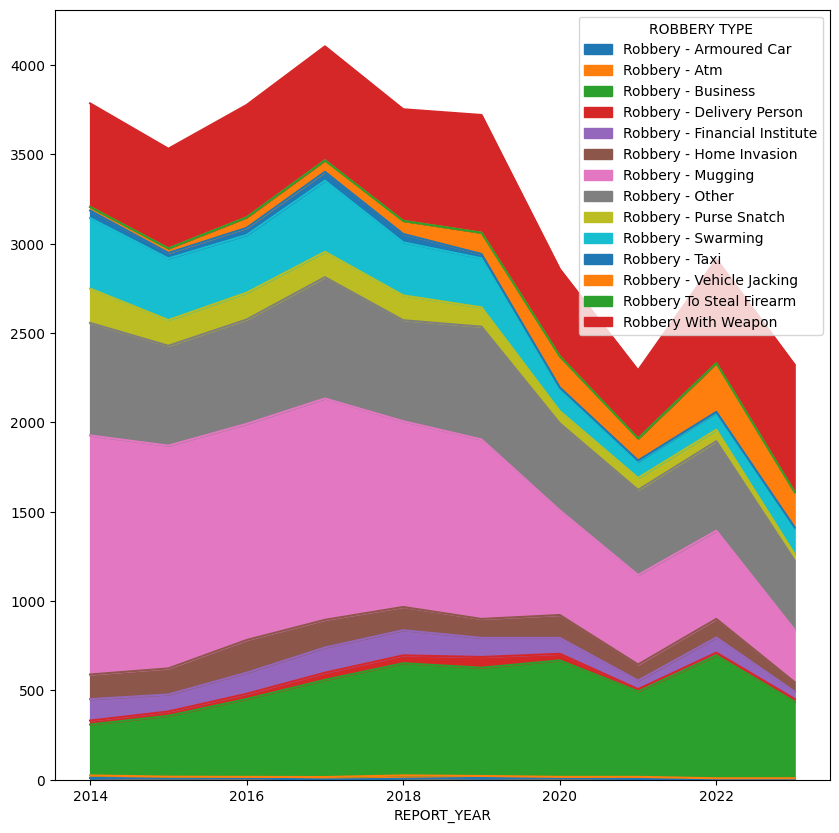

In [ ]:
df_area.plot.area(figsize=(10, 10), stacked=True)

Looks fine, however there seems to be some weird things like why do all area plots for each category have the a similar shape? Let's try setting the stacked argument to False:

<Axes: xlabel='REPORT_YEAR'>

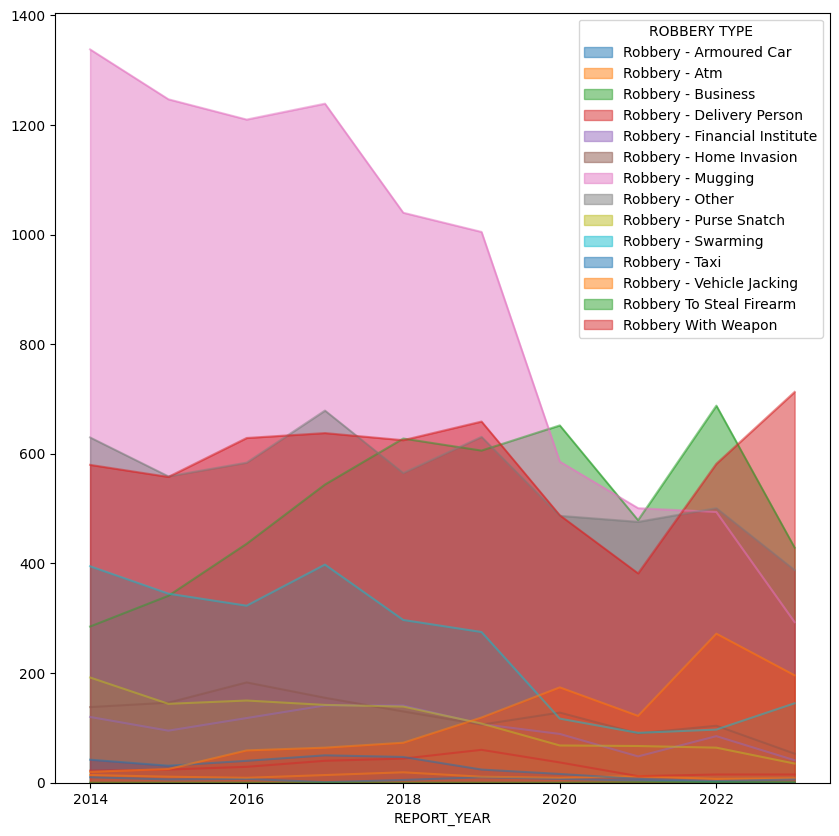

In [ ]:
df_area.plot.area(figsize=(10, 10), stacked=False)

Much better! Let's add some labels to the plot:

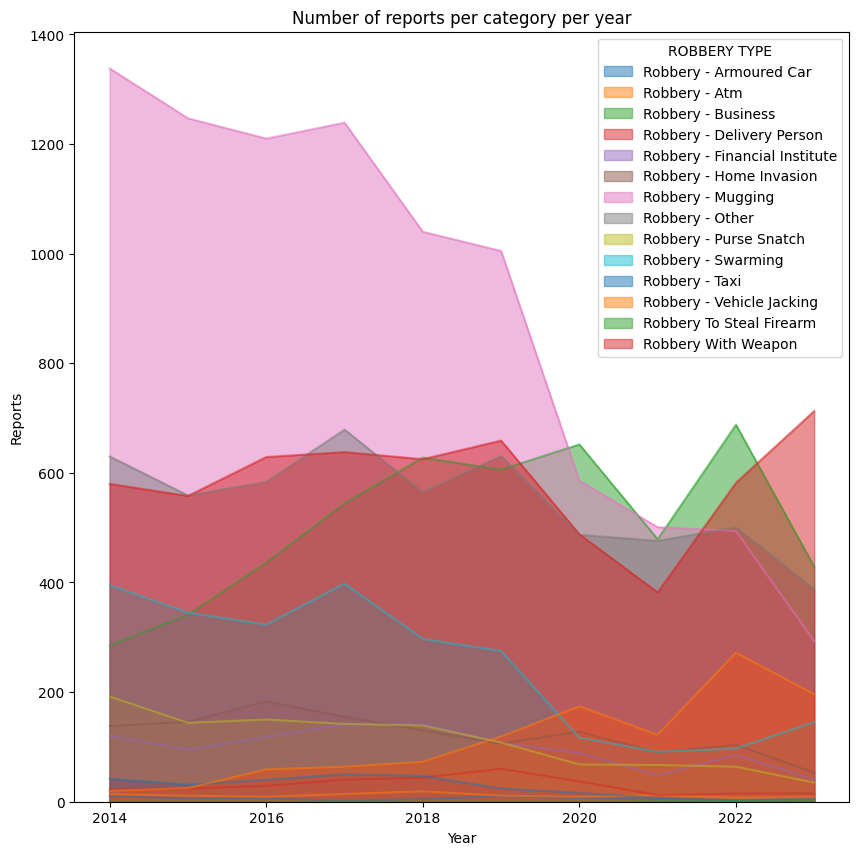

In [ ]:
ax = df_area.plot.area(figsize=(10, 10), stacked=False)
ax.set_title('Number of reports per category per year')
ax.set_xlabel('Year')
ax.set_ylabel('Reports')
plt.show()

# Easier way to do it:

In [ ]:
df_easy = df_clean.groupby(['REPORT_YEAR', 'OFFENCE'])['OFFENCE']\
            .count().\
            unstack(1)

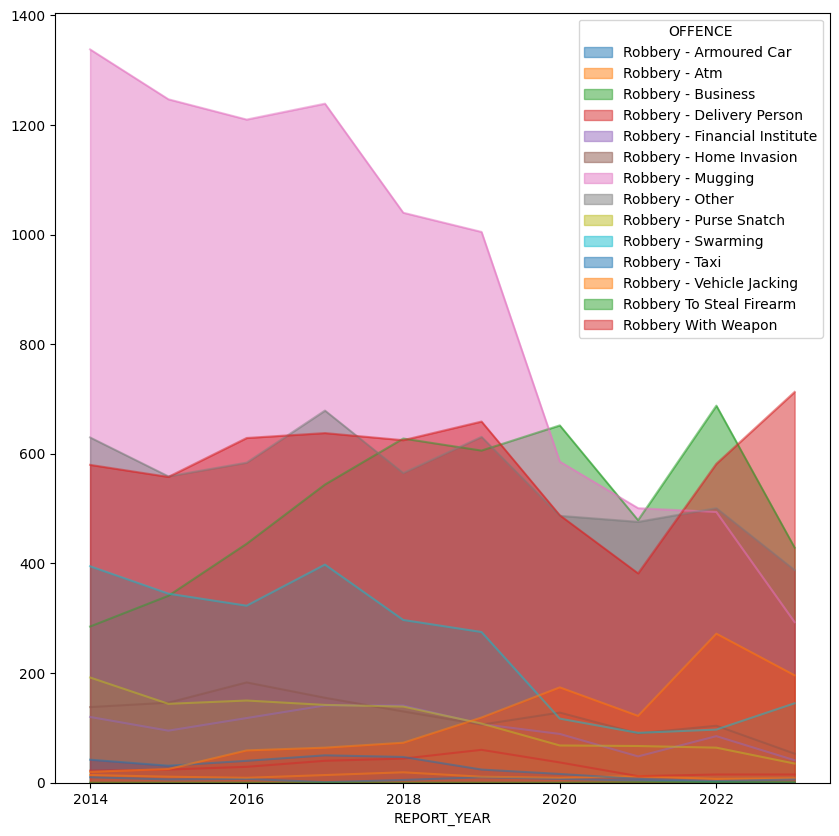

In [ ]:
df_easy.plot.area(stacked=False, figsize=(10, 10))
ax.set_title('Number of reports per category per year')
ax.set_xlabel('Year')
ax.set_ylabel('Reports')
plt.show()

<Axes: xlabel='REPORT_YEAR'>

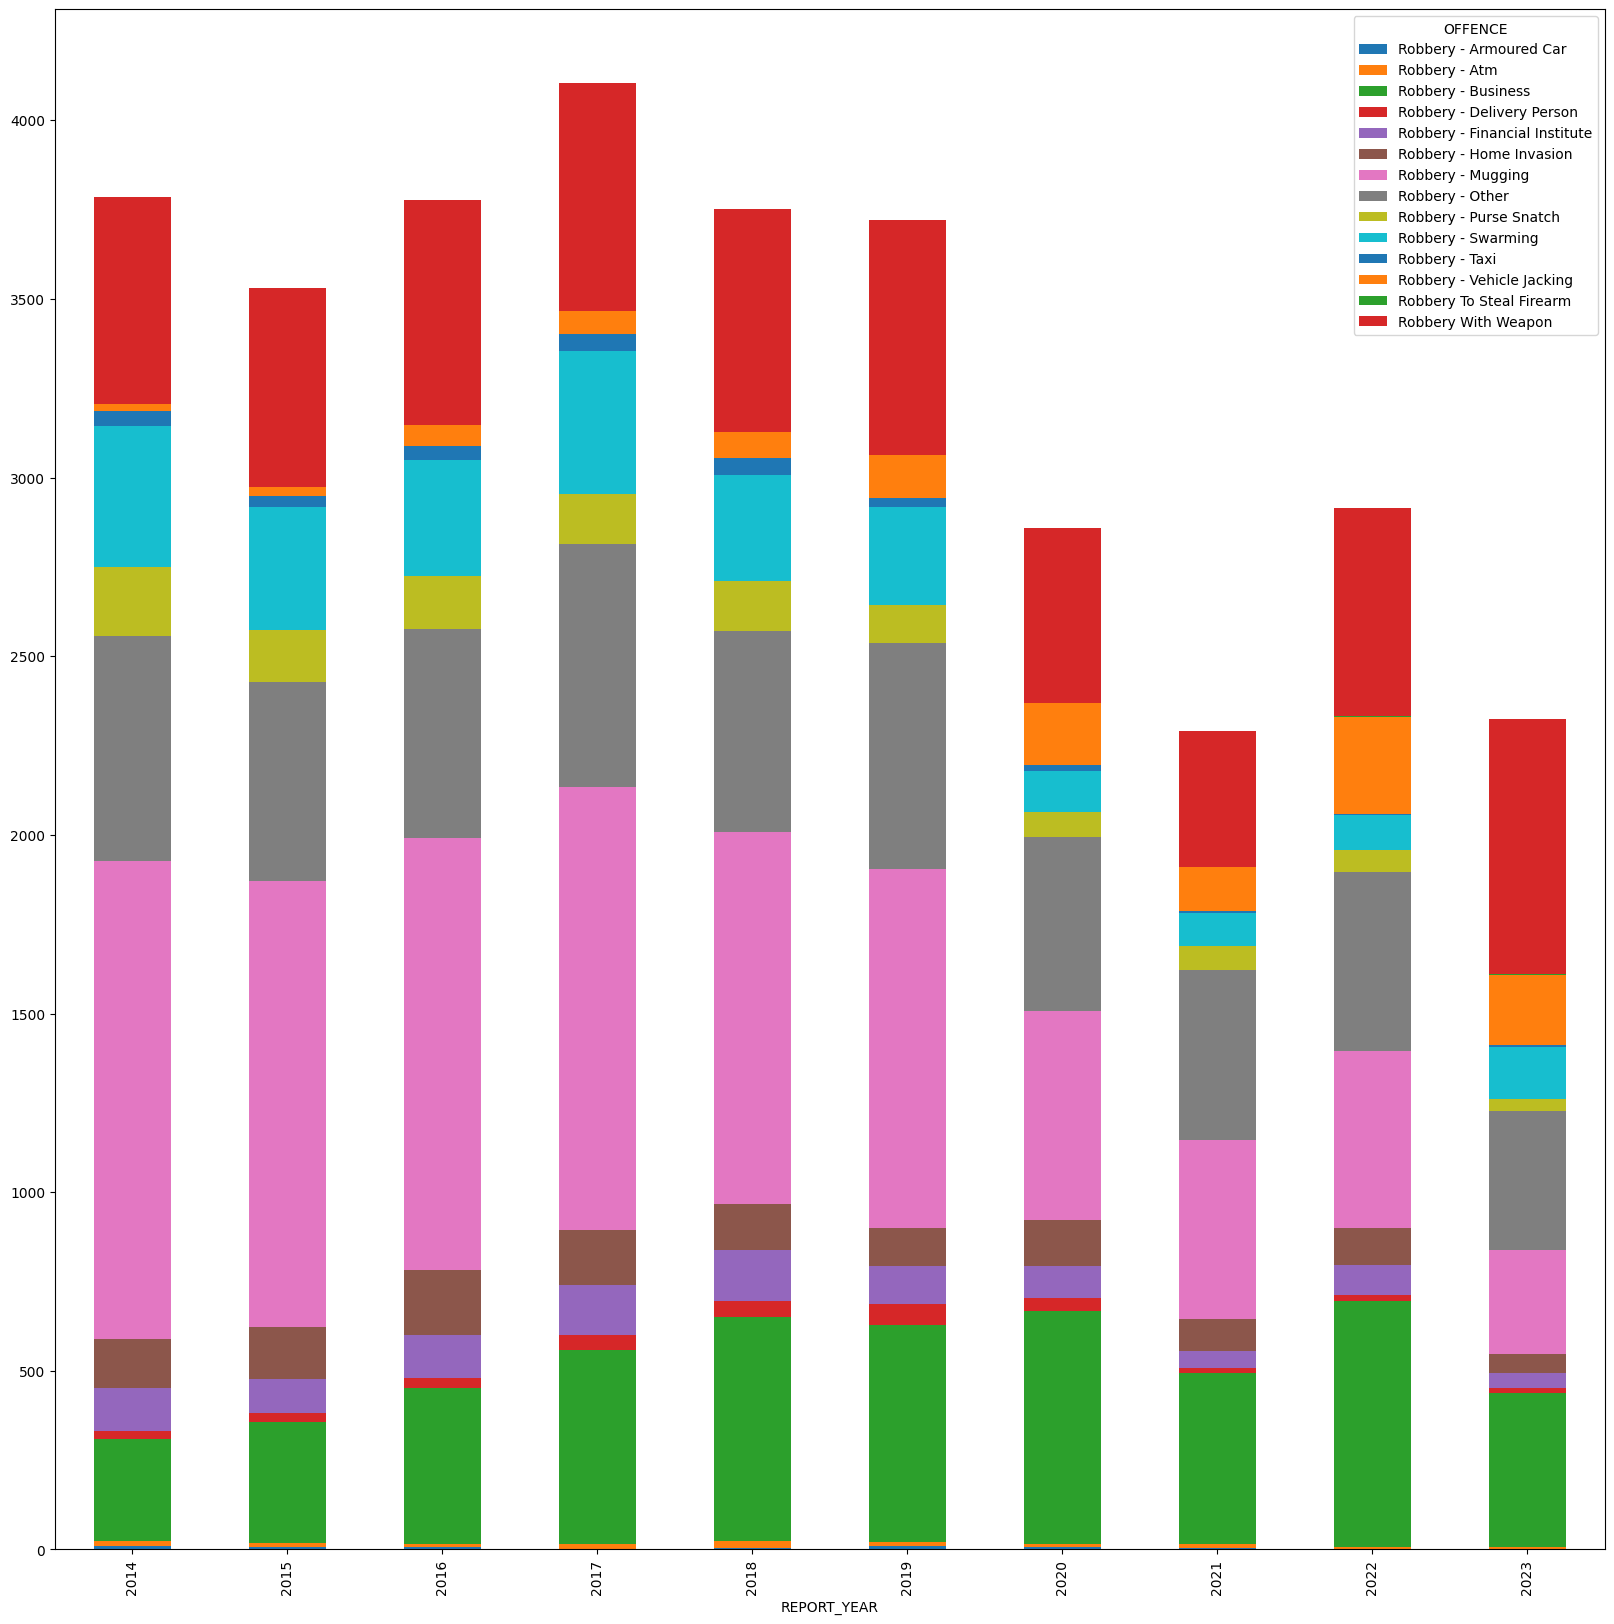

In [ ]:
df_easy.plot.bar(figsize=(20, 20), stacked=True)

<Axes: xlabel='REPORT_YEAR'>

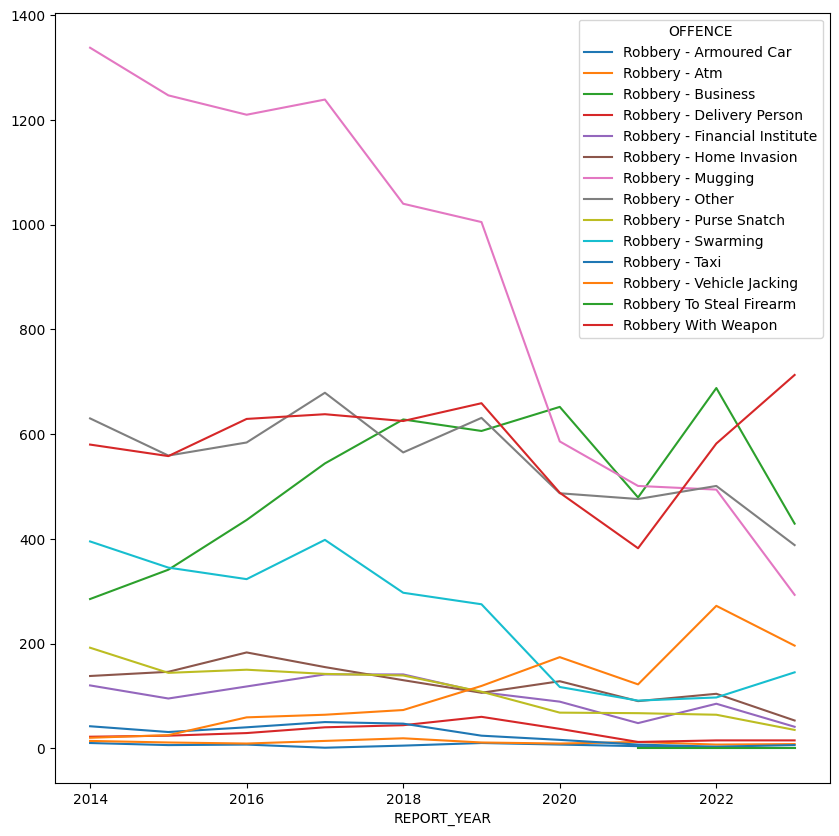

In [ ]:
df_easy.plot.line(figsize=(10, 10))